<a href="https://colab.research.google.com/github/Ayatri/GWDA/blob/main/Copy_of_Redshift_horizon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###*In oder to use pycbc package we need install it first*. 



[link text](https://pycbc.org)

In [1]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

     |████████████████████████████████| 6.3MB 11.4MB/s 
     |████████████████████████████████| 27.3MB 1.3MB/s 
     |████████████████████████████████| 890kB 44.5MB/s 
     |████████████████████████████████| 81kB 46.9MB/s 
     |████████████████████████████████| 1.6MB 54.0MB/s 
     |████████████████████████████████| 61kB 45.4MB/s 
     |████████████████████████████████| 61kB 54.4MB/s 
     |████████████████████████████████| 3.2MB 50.0MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=2f9066b2b06615b9a6ba8d858632ef61641eac7f99286b7f371ff726d7aaa998
  Stored in directory: /tmp/pip-ephem-wheel-cache-c6r8lx2c/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
  Created wheel for lscsoft-glue: filename=lscsoft_glue-2.0.0-cp37-cp37m-linux_x86_64.whl size=416785 sha256=5f1adb1f0cae00629b6ec679a7fb35d92bb1024c45f8c14e9060dcf9ed730c36
  Stored in directory: /tmp/pip-ephem-wheel-cache-c6r8lx2c/wheels/aa/fa/38/d61b002c627ca54f03755b9a288f4b

In [2]:
%matplotlib inline
from pycbc.waveform import td_approximants, fd_approximants
import pylab

print('Avilable modeled frequency domain waveform',fd_approximants())

Avilable modeled frequency domain waveform ['EccentricFD', 'TaylorF2', 'TaylorF2Ecc', 'TaylorF2NLTides', 'TaylorF2RedSpin', 'TaylorF2RedSpinTidal', 'SpinTaylorF2', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2_ROM_DoubleSpin_HI', 'Lackey_Tidal_2013_SEOBNRv2_ROM', 'SEOBNRv4_ROM', 'SEOBNRv4HM_ROM', 'SEOBNRv4_ROM_NRTidal', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'SEOBNRv4T_surrogate', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidal', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomP', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'SpinTaylorT4Fourier', 'SpinTaylorT5Fourier', 'NRSur4d2s', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'SpinTaylorF2_SWAPPER', 'TaylorF2NL', 'PreTaylorF2', 'multiband', 'TaylorF2_INTERP', 'SpinTaylorT5', 'SEOBNRv1_ROM_Ef

###Load Detector Sensitivity curves

One can lad directly from pycbc.psd package or can load from the data files. 

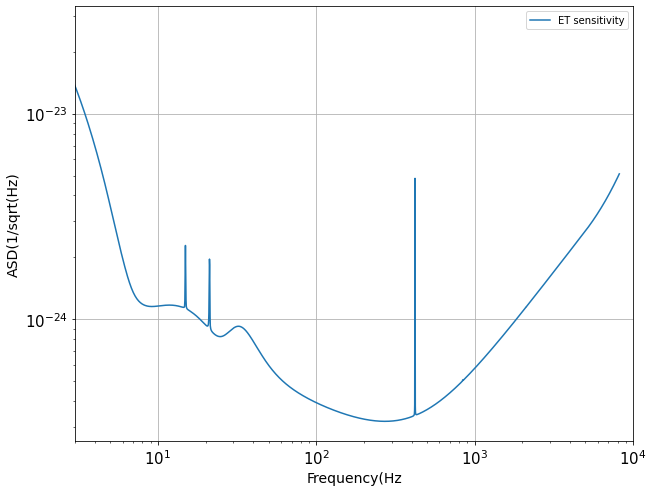

In [3]:
import pycbc.psd
import numpy as np
from numpy import *

'''
This gives us the sensitivity of ET
'''
flow = 2. #Lower cutoff frequency
delta_f = 1.0 /16
flen = int( 8192.0/ (delta_f)) + 1
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)
psd.data[:int(flow/delta_f)] = np.inf
psd.data[-1] = np.inf
psd_ET = psd


pylab.figure(figsize=[10, 8])
pylab.loglog(psd_ET.sample_frequencies, psd_ET**0.5, label= 'ET sensitivity')
pylab.xlabel('Frequency(Hz', size = 14)
pylab.ylabel('ASD(1/sqrt(Hz)', size= 14)
pylab.xlim(3, 1e4)
pylab.grid()
pylab.tick_params(labelsize = 15)
pylab.legend()
pylab.show()


#**Figure of merits for netowork of detectors**

[paper by B.F.Schutz](https://arxiv.org/abs/1102.5421)


##**Network antenna patterns and the amplitude distribution of detected events**

strain δL/L of the interferometer is 
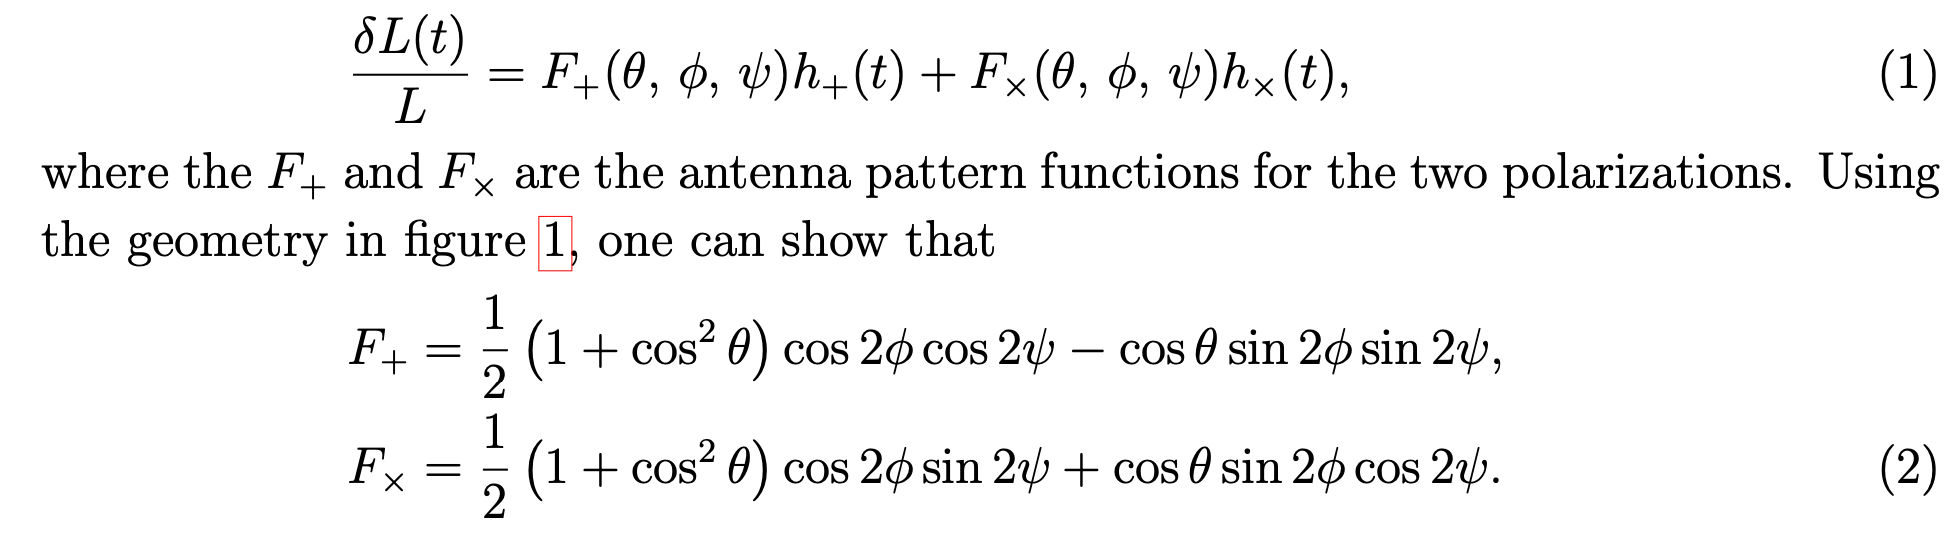



In [4]:
"""Return the antenna pattern factors F+ and Fx as a function of sky
    location and polarization angle for a hypothetical interferometer located
    at the north pole. Angles are in radians. Declinations of ±π/2 correspond
    to the normal to the detector plane (i.e. overhead and underneath) while
    the point with zero right ascension and declination is the direction
    of one of the interferometer arms.
    Parameters
    ----------
    theta: float
    phi: float
    psi: float
    Returns
    -------
    f_plus: float
    f_cros: float
"""

def antenna_pattern_L(theta, phi, psi):
    polarization = psi
    f_plus  =  (1.0/2.0) * (1.0 + cos(theta)*cos(theta)) * \
                cos (2.0 * phi) * cos (2.0 * polarization) - \
                cos(theta) * sin(2.0*phi) * sin (2.0 * polarization)

    f_cross =   (1.0/2.0) * (1.0 + cos(theta)*cos(theta)) * \
                cos (2.0 * phi) * sin (2.0* polarization) + \
                cos(theta) * sin(2.0*phi) * cos (2.0 * polarization)
    return f_plus, f_cross




###**For ET with 60^deg opening angle of the detector, the antenna factors can be written as **- 
[ET mock data challange paper](https://arxiv.org/pdf/1201.3563.pdf)
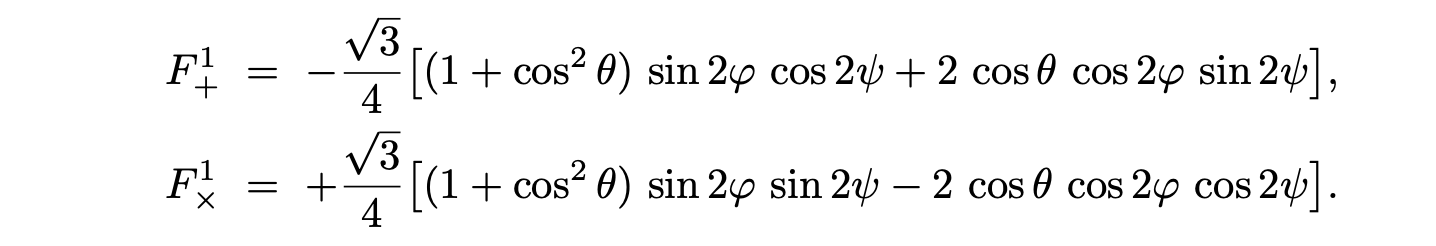

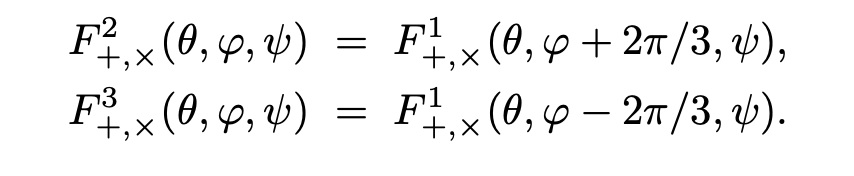

In [5]:
def f_antenna_pattern60(theta, phi, psi):
    f_plus  =  -((3**0.5)/4) * ((1 + cos(theta)*cos(theta)) * \
                sin (2 * phi) * cos (2 * psi) + \
                2*cos(theta) * cos(2*phi) * sin (2 * psi))

    f_cross =   +((3**0.5)/4) * ((1 + cos(theta)*cos(theta)) * \
                sin (2.0 * phi) * sin (2 * psi)  - \
                2*cos(theta) * cos(2*phi) * cos (2 * psi))
    return f_plus, f_cross



**Distribution of sources( with random uniform sky location)**


In [6]:
theta_test = np.arccos(np.random.uniform(0, 1, 10000))
phi_test = np.random.uniform(0, 2* pi , 10000)


#Network of detectors - 
Here our aim is to study different possible configuration of Einstein Telescope -
We consider 4 different configuration - 

**1. ET - triangle , arm length 10km**

**2. ET - single 'L' with 15 km arm length 15 km**

**3. ET - 2 'L's with 45^deg rotated w.r.t each other(arm length 7.5km)**

**4. ET - 2 'L's with 45^deg rotated w.r.t each other(arm length 15km)**

Lets consider the first case - **ET - triangle , arm length 10km**

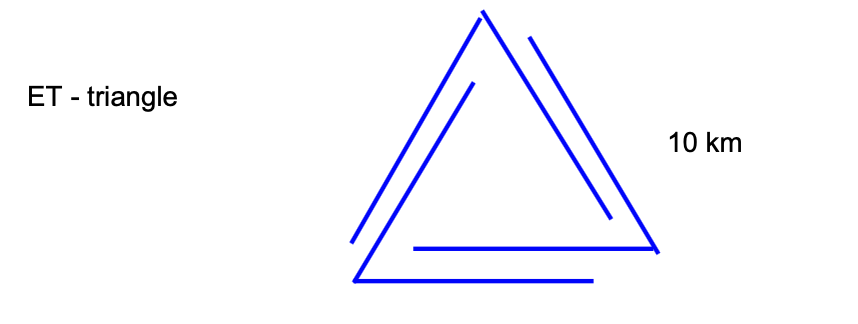

In [7]:
def Antenna_pattern_avraged_psi_avarge_iota_ET_tri(theta, phi):
    '''
    Returns F^2_rms, mean square antenna pattern avagring over inclination angle
    '''
    #psi = np.linspace(0, 4*pi/2.0, 100)
    Cos_i = np.linspace(-1, 1 , 1000) #iota- inclination angle
    iota = np.arccos(Cos_i)
    theta, phi = theta, phi
    # we have chosen psi =0, in principle one can also varry psi. 
    #psi = 0
    f1_plus, f1_cross = f_antenna_pattern60(theta, phi, 0)
    f2_plus, f2_cross = f_antenna_pattern60(theta, phi + 2* pi/3.0, 0)
    f3_plus, f3_cross = f_antenna_pattern60(theta, phi - 2* pi/3.0, 0)
    Fp_rms = (f1_plus**2 + f2_plus**2 + f3_plus**2)
    Fc_rms = (f1_cross**2 + f2_cross**2 + f3_cross**2)
    
    F_plus_incIota = (1/4.0)*((1 + np.cos(iota)**2)**2)* Fp_rms
    F_cross_incIota =  (np.cos(iota)**2 )* Fc_rms
    F = (F_plus_incIota + F_cross_incIota)
    return F
    

In [8]:
F_list = []
for i in range(len(theta_test)):
    F = Antenna_pattern_avraged_psi_avarge_iota_ET_tri(theta_test[i],phi_test[i])
    F_list.extend(F)
#Computing the minimum vale of F_rms for 10%, 50%, 90% sources. 

F_list = np.array(F_list)
F_te  = sorted(F_list)
n_10e = int(len(F_te)*10/100)
n_50e = int(len(F_te)*50/100)
n_90e = int(len(F_te)*90/100)
F_90 = F_te[-n_90e]
F_50 = F_te[-n_50e]
F_10 = F_te[-n_10e]
F_max = F_te[-1]


In [9]:
print ( F_max, F_10, F_50)

2.248754172827986 0.8582215074793104 0.24246606764367676


We can write **SNR** as - 
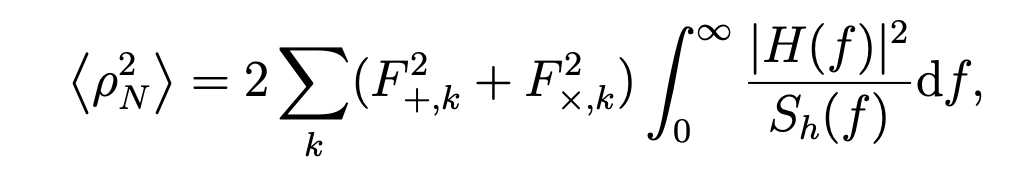

Hence, SNR also depends on the location of the sources, We can split this into two parts- first part is the antenna pattern function which depends on the source location, which we have computed in the previous cell. 

Second term inside the integration, which is same of every location. 

In [10]:
'''
Lets consider equal mass sytem binary
'''
m1 = np.arange(0.5, 4000, 5)
m2 = m1 

SNR_list_ET = []
psd = psd_ET
from pycbc.waveform import get_fd_waveform
for i in range(len(m1)):   
    hp, hc = get_fd_waveform(approximant="IMRPhenomD",  
                         mass1=m1[i],
                         mass2=m2[i],
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=3.0, f_final = 8192.0)    #d = 4000 Mpc

    
    SNR = (2* np.sum((((hp*np.conj(hp) + hc*np.conj(hc))*hp.delta_f/psd).data).real))**0.5 
    SNR_list_ET.append(SNR)
    

SNR_list_ET = np.array(SNR_list_ET)


'''
Now let's multiply the SNRList to the antenna pattern factors(F_rms^2) for 90%, 50%, 10%, the maximum value of (F_rms) 
to get the horizon distance of the detector
'''

SNR_list_ET_trinangle = np.array(SNR_list_ET) * (F_max**0.5)
SNR_list_ET_trinangle_90p = np.array(SNR_list_ET) * (F_90**0.5)
SNR_list_ET_trinangle_50p = np.array(SNR_list_ET) * (F_50**0.5)
SNR_list_ET_trinangle_10p = np.array(SNR_list_ET) * (F_10**0.5)

#Redshift plot


We need to find out the distnace for which the SNR will be 8, we know SNR is proportional to 1/d, d is the distance of the 
source. For this example I have se the distance to be 1000Mpc, then the horison distance should be = estimated SNR *1000/8.0. 


Then we can find the redshift. 

In [11]:
from pycbc.cosmology import _redshift
'''
Horizon distance
'''
Horizon_dist_ET_trinangle = SNR_list_ET_trinangle * 1000/8.0  #unit in Mpc
R_ET_trinangle = _redshift(Horizon_dist_ET_trinangle)

'''
limit on Horizon distance for 90% best sources
'''
Horizon_dist_ET_trinangle_90p = SNR_list_ET_trinangle_90p * 1000/8.0  #unit in Mpc
R_ET_trinangle_90p = _redshift(Horizon_dist_ET_trinangle_90p)

'''
limit on Horizon distance for 50% best sources
'''

Horizon_dist_ET_trinangle_50p = SNR_list_ET_trinangle_50p * 1000/8.0  #unit in Mpc
R_ET_trinangle_50p = _redshift(Horizon_dist_ET_trinangle_50p)

'''
limit on Horizon distance for 10% best sources
'''

Horizon_dist_ET_trinangle_10p = SNR_list_ET_trinangle_10p * 1000/8.0  #unit in Mpc
R_ET_trinangle_10p = _redshift(Horizon_dist_ET_trinangle_10p)


In [12]:
thick_fontsize = 16
axis_label_fontsize = 18
title_fontsize = 18
legend_fontsize = 14
thick_width = 1.25
thick_length = 9


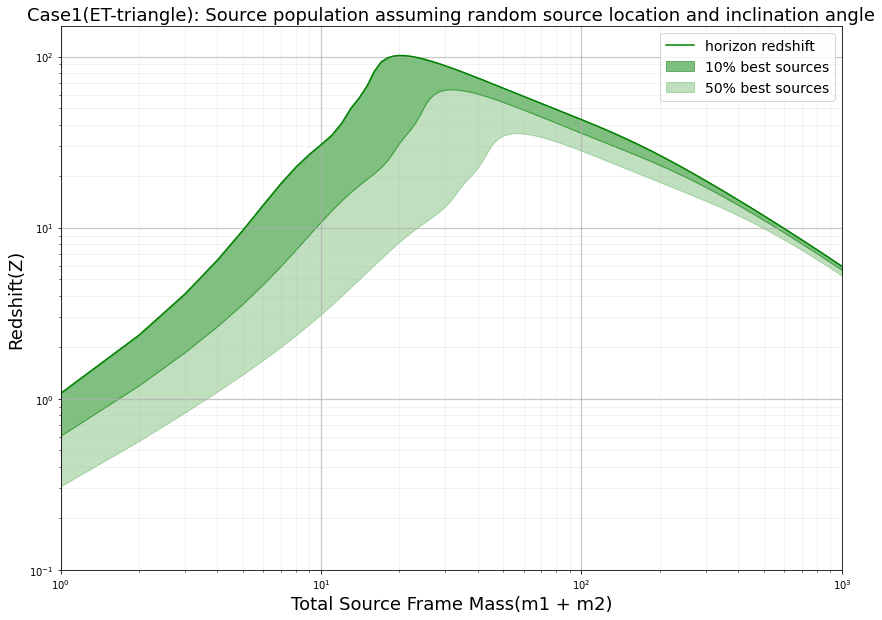

In [13]:
TotalMass = np.linspace(1, 1e3, 1000)
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
Mass = m1 + m2
R =  R_ET_trinangle
f = interp1d(Mass/(1+ R), R, kind='cubic') #f is the function for interpolation
R_interpolated = f(TotalMass)

R_10 =  R_ET_trinangle_10p
f = interp1d(Mass/(1+ R_10), R_10, kind='cubic')
R_10_interpolated = f(TotalMass)

R_50 =  R_ET_trinangle_50p
f = interp1d(Mass/(1+ R_50), R_50, kind='cubic')
R_50_interpolated = f(TotalMass)


#####Plot the figure###########################################
pylab.figure(figsize=(14,10))
pylab.loglog(TotalMass, R_interpolated, color = 'green', label = 'horizon redshift')
pylab.fill_between(TotalMass , R_interpolated,R_10_interpolated,color = 'green',alpha=.5, label = '10% best sources')
pylab.fill_between(TotalMass , R_10_interpolated, R_50_interpolated,color = 'green', alpha=.25, label = '50% best sources')

plt.grid('True')

pylab.ylabel('Redshift(Z)', size = 18)
pylab.xlabel('Total Source Frame Mass(m1 + m2)', size = 18)
pylab.title('Case1(ET-triangle): Source population assuming random source location and inclination angle', size = 18)
pylab.ylim(0.1, 150)
pylab.xlim(1, 1e3)
plt.grid(True, which='both')
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.2)
plt.grid(linewidth = thick_width)

pylab.legend(fontsize=14)

Reshift_ET_tri, Reshift_ET_tri_10per, Reshift_ET_tri_50per = R_interpolated, R_10_interpolated, R_50_interpolated


#Network 2 - Single ET - L shaped 15km arm length

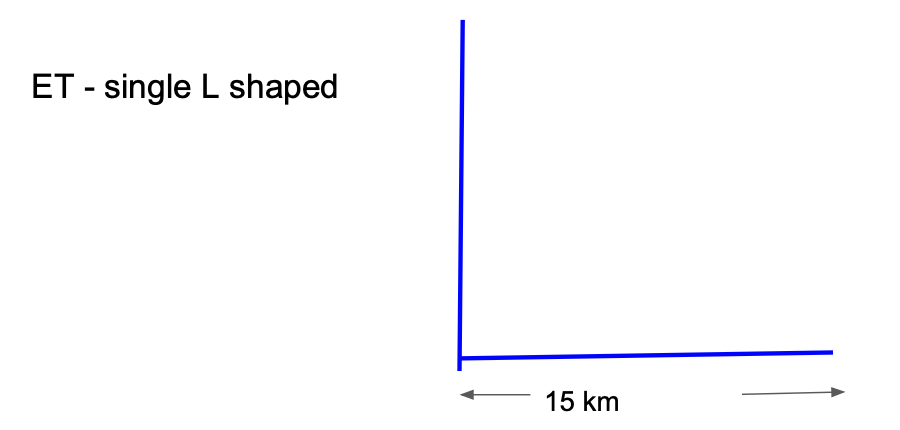

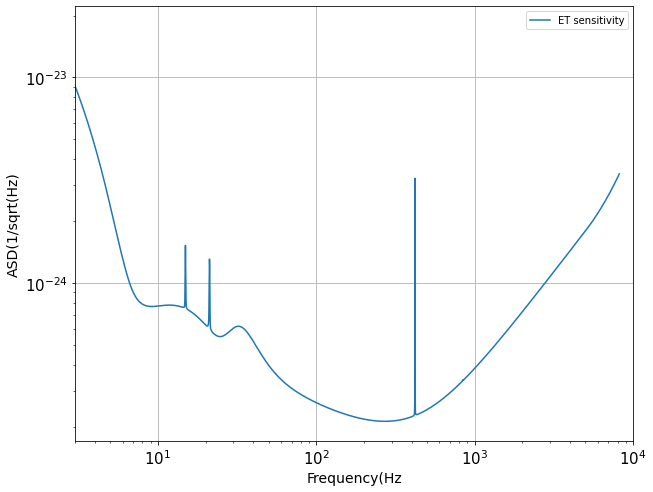

In [14]:
'''
Firstly rescale the Psd curve for 15 km arm length
'''

import pycbc.psd
import numpy as np
from numpy import *

'''
This gives us the sensitivity of ET
'''
flow = 2. #Lower cutoff frequency
delta_f = 1.0 /16
flen = int( 8192.0/ (delta_f)) + 1
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)* ((10.0/15)**2)
psd.data[:int(flow/delta_f)] = np.inf
psd.data[-1] = np.inf
psd_ET_L15km = psd

pylab.figure(figsize=[10, 8])
pylab.loglog(psd_ET_L15km.sample_frequencies, psd_ET_L15km**0.5, label= 'ET sensitivity')
pylab.xlabel('Frequency(Hz', size = 14)
pylab.ylabel('ASD(1/sqrt(Hz)', size= 14)
pylab.xlim(3, 1e4)
pylab.grid()
pylab.tick_params(labelsize = 15)
pylab.legend()
pylab.show()


In [20]:
def Antenna_pattern_avraged_psi_avarge_iota_singleET_L(theta, phi):
    #psi = np.linspace(0, 4*pi/2.0, 100)
    Cos_i = np.linspace(-1, 1 , 1000)
    iota = np.arccos(Cos_i)
    theta, phi = theta, phi
    f1_plus, f1_cross = antenna_pattern_L(theta, phi, 0)
    Fp_rms = (f1_plus**2  )
    Fc_rms = (f1_cross**2 )
    F_plus_incIota = (1/4.0)*((1 + np.cos(iota)**2)**2)* Fp_rms
    F_cross_incIota =  (np.cos(iota)**2 )* Fc_rms
    F = (F_plus_incIota + F_cross_incIota)
    return F

F_list = []
for i in range(len(theta_test)):
    F = Antenna_pattern_avraged_psi_avarge_iota_singleET_L(theta_test[i],phi_test[i])
    F_list.extend(F)

#Computing the minimum vale of F_rms for 10%, 50%, 90% sources. 
F_list = np.array(F_list)
F_te  = sorted(F_list)
n_10e = int(len(F_te)*10/100)
n_50e = int(len(F_te)*50/100)
n_90e = int(len(F_te)*90/100)
F_90 = F_te[-n_90e]
F_50 = F_te[-n_50e]
F_10 = F_te[-n_10e]
F_max = F_te[-1]


In [25]:
F_10

0.38570536627109997

In [17]:
psd = psd_ET_L15km
m1 = np.arange(0.5, 4000, 5)
m2 = m1
SNR_list_ET = []
for i in range(len(m1)):
    hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=m1[i],
                         mass2=m2[i],
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=3.0, f_final = 8192.0)    #d = 4000 Mpc
    

    
    SNR1 = (2* np.sum((((hp*np.conj(hp) + hc*np.conj(hc))*hp.delta_f/psd).data).real))**0.5 
    SNR_list_ET.append(SNR1)
    
    
SNR_list_ET_singleL15km = np.array(SNR_list_ET) * (F_max**0.5)
SNR_list_ET_singleL15km_90p = np.array(SNR_list_ET) * (F_90**0.5)
SNR_list_ET_singleL15km_50p = np.array(SNR_list_ET) * (F_50**0.5)
SNR_list_ET_singleL15km_10p = np.array(SNR_list_ET) * (F_10**0.5)


In [18]:
from pycbc.cosmology import _redshift
'''
Horizon distance
'''
Horizon_dist_ET_singleL15km = SNR_list_ET_singleL15km * 1000/8.0  #unit in Mpc
R_ET_singleL15km = _redshift(Horizon_dist_ET_singleL15km)

'''
limit on Horizon distance for 90% best sources
'''
Horizon_dist_ET_singleL15km_90p = SNR_list_ET_singleL15km_90p * 1000/8.0  #unit in Mpc
R_ET_singleL15km_90p = _redshift(Horizon_dist_ET_singleL15km_90p)

'''
limit on Horizon distance for 50% best sources
'''

Horizon_dist_ET_singleL15km_50p = SNR_list_ET_singleL15km_50p * 1000/8.0  #unit in Mpc
R_ET_singleL15km_50p = _redshift(Horizon_dist_ET_singleL15km_50p)

'''
limit on Horizon distance for 10% best sources
'''

Horizon_dist_ET_singleL15km_10p = SNR_list_ET_singleL15km_10p * 1000/8.0  #unit in Mpc
R_ET_singleL15km_10p = _redshift(Horizon_dist_ET_singleL15km_10p)


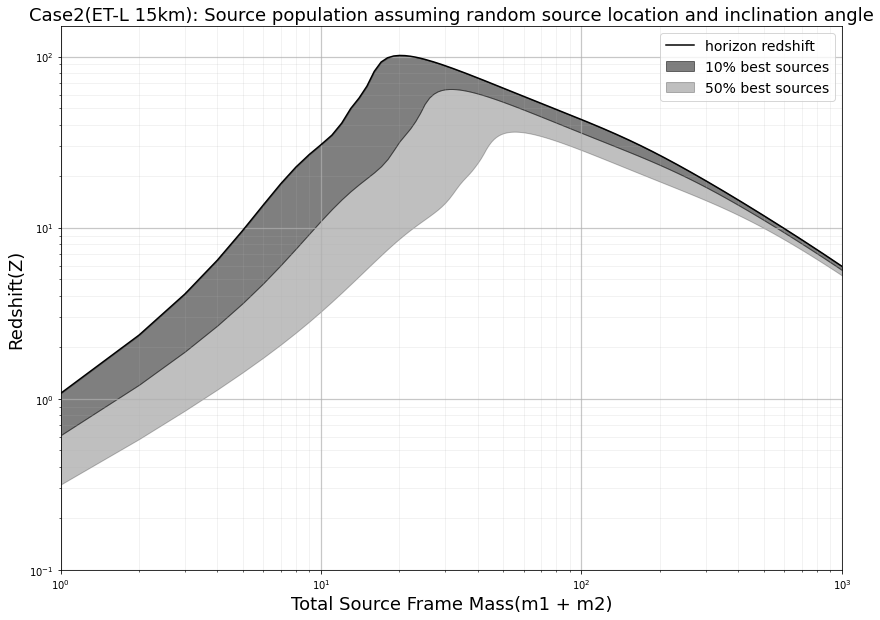

In [19]:
TotalMass = np.linspace(1, 1e3, 1000)
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
Mass = m1 + m2
R =  R_ET_singleL15km
f = interp1d(Mass/(1+ R), R, kind='cubic') #f is the function for interpolation
R_interpolated = f(TotalMass)

R_10 =  R_ET_singleL15km_10p
f = interp1d(Mass/(1+ R_10), R_10, kind='cubic')
R_10_interpolated = f(TotalMass)

R_50 =  R_ET_singleL15km_50p
f = interp1d(Mass/(1+ R_50), R_50, kind='cubic')
R_50_interpolated = f(TotalMass)


#####Plot the figure###########################################
pylab.figure(figsize=(14,10))
pylab.loglog(TotalMass, R_interpolated, color = 'black', label = 'horizon redshift')
pylab.fill_between(TotalMass , R_interpolated,R_10_interpolated,color = 'black',alpha=.5, label = '10% best sources')
pylab.fill_between(TotalMass , R_10_interpolated, R_50_interpolated,color = 'black', alpha=.25, label = '50% best sources')

plt.grid('True')

pylab.ylabel('Redshift(Z)', size = 18)
pylab.xlabel('Total Source Frame Mass(m1 + m2)', size = 18)
pylab.title('Case2(ET-L 15km): Source population assuming random source location and inclination angle', size = 18)
pylab.ylim(0.1, 150)
pylab.xlim(1, 1e3)
plt.grid(True, which='both')
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.2)
plt.grid(linewidth = thick_width)

pylab.legend(fontsize=14)

Reshift_ET_singleL15km, Reshift_ET_singleL15km_10per, Reshift_ET_singleL15km_50per = R_interpolated, R_10_interpolated, R_50_interpolated


#Network = 3 : 2 ET -Shaped 15 km(45^deg rotated)

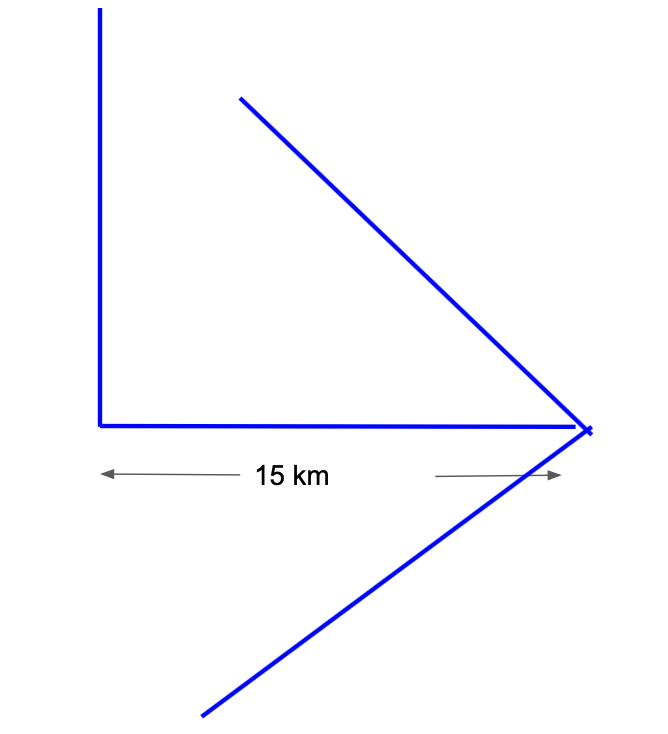

In [ ]:
def Antenna_pattern_avraged_psi_avarge_iota_2ET_L_45degRotated(theta, phi):
    #psi = np.linspace(0, 4*pi/2.0, 100)
    Cos_i = np.linspace(-1, 1 , 1000)
    iota = np.arccos(Cos_i)
    theta, phi = theta, phi
    f1_plus, f1_cross = antenna_pattern_L(theta, phi, 0)
    f2_plus, f2_cross = antenna_pattern_L(theta, phi + 3* pi/4.0, 0)
    Fp_rms = (f1_plus**2 + f2_plus**2 )
    Fc_rms = (f1_cross**2 + f2_cross**2)
    F_plus_incIota = (1/4.0)*((1 + np.cos(iota)**2)**2)* Fp_rms
    F_cross_incIota =  (np.cos(iota)**2 )* Fc_rms
    F = (F_plus_incIota + F_cross_incIota)
    return F

psd = psd_ET_L15km

F_list = []
for i in range(len(theta_test)):
    F = Antenna_pattern_avraged_psi_avarge_iota_2ET_L_45degRotated(theta_test[i],phi_test[i])
    F_list.extend(F)
    
#Computing the minimum vale of F_rms for 10%, 50%, 90% sources. 
F_list = np.array(F_list)
F_te  = sorted(F_list)
n_10e = int(len(F_te)*10.0/100)
n_50e = int(len(F_te)*50.0/100)
n_90e = int(len(F_te)*90.0/100)
F_90 = F_te[-n_90e]
F_50 = F_te[-n_50e]
F_10 = F_te[-n_10e]
F_max = F_te[-1]


In [ ]:
psd = psd_ET_L15km
m1 = np.arange(0.5, 4000, 5)
m2 = m1
SNR_list_ET = []
for i in range(len(m1)):
    hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=m1[i],
                         mass2=m2[i],
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=3.0, f_final = 8192.0)    #d = 4000 Mpc
    

    
    SNR1 = (2* np.sum((((hp*np.conj(hp) + hc*np.conj(hc))*hp.delta_f/psd).data).real))**0.5 
    SNR_list_ET.append(SNR1)
    
    
SNR_list_ET_2L_15km = np.array(SNR_list_ET) * (F_max**0.5)
SNR_list_ET_2L_15km_90p = np.array(SNR_list_ET) * (F_90**0.5)
SNR_list_ET_2L_15km_50p = np.array(SNR_list_ET) * (F_50**0.5)
SNR_list_ET_2L_15km_10p = np.array(SNR_list_ET) * (F_10**0.5)


In [ ]:
from pycbc.cosmology import _redshift
'''
Horizon distance
'''
Horizon_dist_ET_2L_15km = SNR_list_ET_2L_15km * 1000/8.0  #unit in Mpc
R_ET_2L_15km = _redshift(Horizon_dist_ET_2L_15km)

'''
limit on Horizon distance for 90% best sources
'''
Horizon_dist_ET_2L_15km_90p = SNR_list_ET_2L_15km_90p * 1000/8.0  #unit in Mpc
R_ET_2L_15km_90p = _redshift(Horizon_dist_ET_2L_15km_90p)

'''
limit on Horizon distance for 50% best sources
'''

Horizon_dist_ET_2L_15km_50p = SNR_list_ET_2L_15km_50p * 1000/8.0  #unit in Mpc
R_ET_2L_15km_50p = _redshift(Horizon_dist_ET_2L_15km_50p)

'''
limit on Horizon distance for 10% best sources
'''

Horizon_dist_ET_2L_15km_10p = SNR_list_ET_2L_15km_10p * 1000/8.0  #unit in Mpc
R_ET_2L_15km_10p = _redshift(Horizon_dist_ET_2L_15km_10p)

from pycbc.cosmology import _redshift
'''
Horizon distance
'''
Horizon_dist_ET_2L_15km = SNR_list_ET_2L_15km * 1000/8.0  #unit in Mpc
R_ET_2L_15km = _redshift(Horizon_dist_ET_2L_15km)

'''
limit on Horizon distance for 90% best sources
'''
Horizon_dist_ET_2L_15km_90p = SNR_list_ET_2L_15km_90p * 1000/8.0  #unit in Mpc
R_ET_2L_15km_90p = _redshift(Horizon_dist_ET_2L_15km_90p)

'''
limit on Horizon distance for 50% best sources
'''

Horizon_dist_ET_2L_15km_50p = SNR_list_ET_2L_15km_50p * 1000/8.0  #unit in Mpc
R_ET_2L_15km_50p = _redshift(Horizon_dist_ET_2L_15km_50p)

'''
limit on Horizon distance for 10% best sources
'''
Horizon_dist_ET_2L_15km_10p = SNR_list_ET_2L_15km_10p * 1000/8.0  #unit in Mpc
R_ET_2L_15km_10p = _redshift(Horizon_dist_ET_2L_15km_10p)


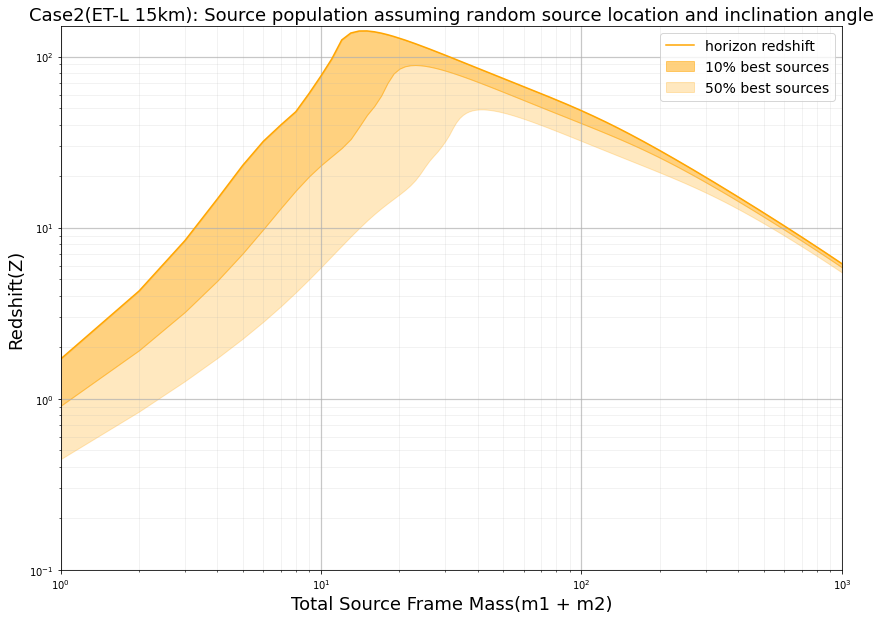

In [ ]:
TotalMass = np.linspace(1, 1e3, 1000)
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
Mass = m1 + m2
R =  R_ET_2L_15km
f = interp1d(Mass/(1+ R), R, kind='cubic') #f is the function for interpolation
R_interpolated = f(TotalMass)

R_10 =  R_ET_2L_15km_10p
f = interp1d(Mass/(1+ R_10), R_10, kind='cubic')
R_10_interpolated = f(TotalMass)

R_50 =  R_ET_2L_15km_50p
f = interp1d(Mass/(1+ R_50), R_50, kind='cubic')
R_50_interpolated = f(TotalMass)


#####Plot the figure###########################################
pylab.figure(figsize=(14,10))
pylab.loglog(TotalMass, R_interpolated, color = 'orange', label = 'horizon redshift')
pylab.fill_between(TotalMass , R_interpolated,R_10_interpolated,color = 'orange',alpha=.5, label = '10% best sources')
pylab.fill_between(TotalMass , R_10_interpolated, R_50_interpolated,color = 'orange', alpha=.25, label = '50% best sources')

plt.grid('True')

pylab.ylabel('Redshift(Z)', size = 18)
pylab.xlabel('Total Source Frame Mass(m1 + m2)', size = 18)
pylab.title('Case2(ET-L 15km): Source population assuming random source location and inclination angle', size = 18)
pylab.ylim(0.1, 150)
pylab.xlim(1, 1e3)
plt.grid(True, which='both')
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.2)
plt.grid(linewidth = thick_width)
pylab.legend(fontsize=14)

Reshift_ET_2L_15kmm, Reshift_ET_2L_15km_10per, Reshift_ET_2L_15km_50per = R_interpolated, R_10_interpolated, R_50_interpolated


#Network = 2 ET 7.5km 45^deg rotated w.r.t. each other

In [ ]:
flow = 2. #Lower cutoff frequency
delta_f = 1.0 /16
flen = int( 8192.0/ (delta_f)) + 1
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)
psd.data[:int(flow/delta_f)] = np.inf
psd.data[-1] = np.inf
psd_ET_L7p5km = psd * (10.0/7.5)**2


In [ ]:
def Antenna_pattern_avraged_psi_avarge_iota_2ET_L_45degRotated(theta, phi):
    #psi = np.linspace(0, 4*pi/2.0, 100)
    Cos_i = np.linspace(-1, 1 , 1000)
    iota = np.arccos(Cos_i)
    theta, phi = theta, phi
    f1_plus, f1_cross = antenna_pattern_L(theta, phi, 0)
    f2_plus, f2_cross = antenna_pattern_L(theta, phi + 3* pi/4.0, 0)

    Fp_rms = (f1_plus**2 + f2_plus**2 )
    Fc_rms = (f1_cross**2 + f2_cross**2)
    F_plus_incIota = (1/4.0)*((1 + np.cos(iota)**2)**2)* Fp_rms
    F_cross_incIota =  (np.cos(iota)**2 )* Fc_rms
    F = (F_plus_incIota + F_cross_incIota)
    return F


psd = psd_ET_L7p5km

F_list = []
for i in range(len(theta_test)):
    F = Antenna_pattern_avraged_psi_avarge_iota_2ET_L_45degRotated(theta_test[i],phi_test[i])
    F_list.extend(F)
    
#Computing the minimum vale of F_rms for 10%, 50%, 90% sources. 
F_list = np.array(F_list)
F_te  = sorted(F_list)
n_10e = int(len(F_te)*10/100)
n_50e = int(len(F_te)*50/100)
n_90e = int(len(F_te)*90/100)
F_90 = F_te[-n_90e]
F_50 = F_te[-n_50e]
F_10 = F_te[-n_10e]
F_max = F_te[-1]


In [ ]:

m1 = np.arange(0.5, 4000, 5)
m2 = m1
SNR_list_ET = []
psd = psd_ET_L7p5km

for i in range(len(m1)):
    hp, hc = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=m1[i],
                         mass2=m2[i],
                         delta_f=1.0/(16.0) ,
                         distance = 1000, 
                         f_lower=3.0, f_final = 8192.0)    #d = 4000 Mpc
    

    
    SNR1 = (2* np.sum((((hp*np.conj(hp) + hc*np.conj(hc))*hp.delta_f/psd).data).real))**0.5 
    SNR_list_ET.append(SNR1)
    
    
SNR_list_ET_2L_7p5km = np.array(SNR_list_ET) * (F_max**0.5)
SNR_list_ET_2L_7p5km_90p = np.array(SNR_list_ET) * (F_90**0.5)
SNR_list_ET_2L_7p5km_50p = np.array(SNR_list_ET) * (F_50**0.5)
SNR_list_ET_2L_7p5km_10p = np.array(SNR_list_ET) * (F_10**0.5)


In [ ]:
from pycbc.cosmology import _redshift
'''
Horizon distance
'''

Horizon_dist_ET_2L_7p5km = SNR_list_ET_2L_7p5km * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km = _redshift(Horizon_dist_ET_2L_7p5km)

'''
limit on Horizon distance for 90% best sources
'''
Horizon_dist_ET_2L_7p5km_90p = SNR_list_ET_2L_7p5km_90p * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km_90p = _redshift(Horizon_dist_ET_2L_7p5km_90p)

'''
limit on Horizon distance for 50% best sources
'''

Horizon_dist_ET_2L_7p5km_50p = SNR_list_ET_2L_7p5km_50p * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km_50p = _redshift(Horizon_dist_ET_2L_7p5km_50p)

'''
limit on Horizon distance for 10% best sources
'''

Horizon_dist_ET_2L_7p5km_10p = SNR_list_ET_2L_7p5km_10p * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km_10p = _redshift(Horizon_dist_ET_2L_7p5km_10p)

from pycbc.cosmology import _redshift
'''
Horizon distance
'''
Horizon_dist_ET_2L_7p5km = SNR_list_ET_2L_7p5km * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km = _redshift(Horizon_dist_ET_2L_7p5km)

'''
limit on Horizon distance for 90% best sources
'''
Horizon_dist_ET_2L_7p5km_90p = SNR_list_ET_2L_7p5km_90p * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km_90p = _redshift(Horizon_dist_ET_2L_7p5km_90p)

'''
limit on Horizon distance for 50% best sources
'''

Horizon_dist_ET_2L_7p5km_50p = SNR_list_ET_2L_7p5km_50p * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km_50p = _redshift(Horizon_dist_ET_2L_7p5km_50p)

'''
limit on Horizon distance for 10% best sources
'''
Horizon_dist_ET_2L_7p5km_10p = SNR_list_ET_2L_7p5km_10p * 1000/8.0  #unit in Mpc
R_ET_2L_7p5km_10p = _redshift(Horizon_dist_ET_2L_7p5km_10p)


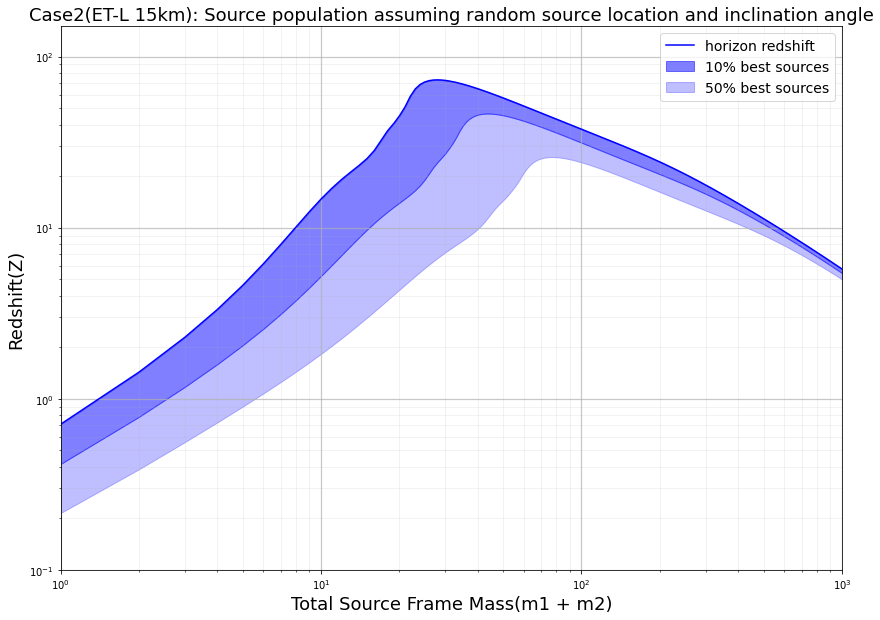

In [ ]:
TotalMass = np.linspace(1, 1e3, 1000)
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
Mass = m1 + m2
R =  R_ET_2L_7p5km
f = interp1d(Mass/(1+ R), R, kind='cubic') #f is the function for interpolation
R_interpolated = f(TotalMass)

R_10 =  R_ET_2L_7p5km_10p
f = interp1d(Mass/(1+ R_10), R_10, kind='cubic')
R_10_interpolated = f(TotalMass)

R_50 =  R_ET_2L_7p5km_50p
f = interp1d(Mass/(1+ R_50), R_50, kind='cubic')
R_50_interpolated = f(TotalMass)


#####Plot the figure###########################################
pylab.figure(figsize=(14,10))
pylab.loglog(TotalMass, R_interpolated, color = 'blue', label = 'horizon redshift')
pylab.fill_between(TotalMass , R_interpolated,R_10_interpolated,color = 'blue',alpha=.5, label = '10% best sources')
pylab.fill_between(TotalMass , R_10_interpolated, R_50_interpolated,color = 'blue', alpha=.25, label = '50% best sources')

plt.grid('True')

pylab.ylabel('Redshift(Z)', size = 18)
pylab.xlabel('Total Source Frame Mass(m1 + m2)', size = 18)
pylab.title('Case2(ET-L 15km): Source population assuming random source location and inclination angle', size = 18)
pylab.ylim(0.1, 150)
pylab.xlim(1, 1e3)
plt.grid(True, which='both')
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.2)
plt.grid(linewidth = thick_width)
pylab.legend(fontsize=14)

Reshift_ET_2L_7p5kmm, Reshift_ET_2L_7p5km_10per, Reshift_ET_2L_7p5km_50per = R_interpolated, R_10_interpolated, R_50_interpolated


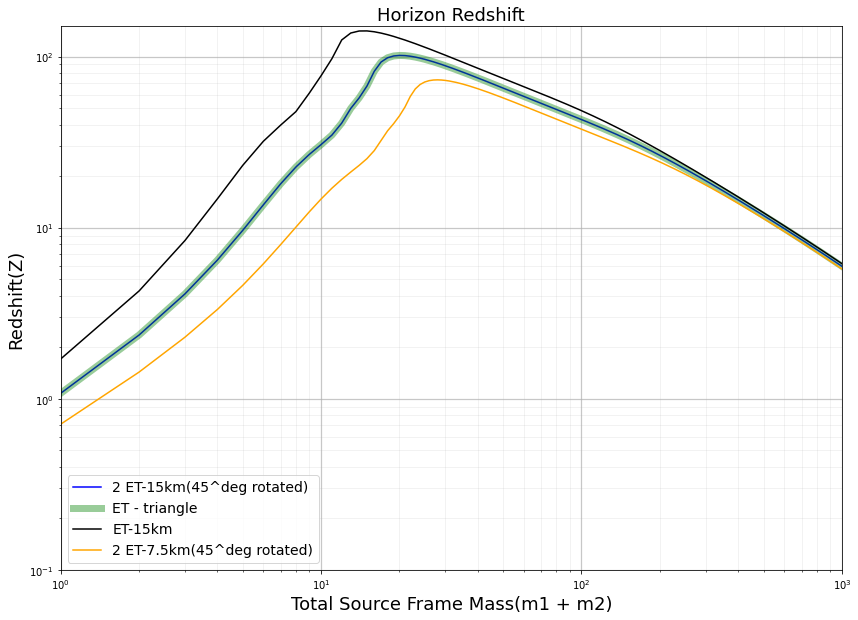

In [ ]:
pylab.figure(figsize=(14,10))
#pylab.fill_between(Mass/(1+ R),R,R10,alpha=.6)
pylab.loglog(TotalMass, Reshift_ET_singleL15km, color = 'blue', label = '2 ET-15km(45^deg rotated)')
pylab.loglog(TotalMass, Reshift_ET_tri, color = 'green', linewidth = 7,alpha = 0.4,  label = 'ET - triangle')
pylab.loglog(TotalMass, Reshift_ET_2L_15kmm, color = 'black', label = 'ET-15km')
pylab.loglog(TotalMass, Reshift_ET_2L_7p5kmm, color = 'orange', label = '2 ET-7.5km(45^deg rotated)')


plt.grid('True')

pylab.ylabel('Redshift(Z)', size = 18)
pylab.xlabel('Total Source Frame Mass(m1 + m2)', size = 18)
pylab.title('Horizon Redshift', size = 18)
pylab.ylim(0.1, 150)
pylab.xlim(1, 1e3)
plt.grid(True, which='both')
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.2)
plt.grid(linewidth = thick_width)

pylab.legend(fontsize=14)




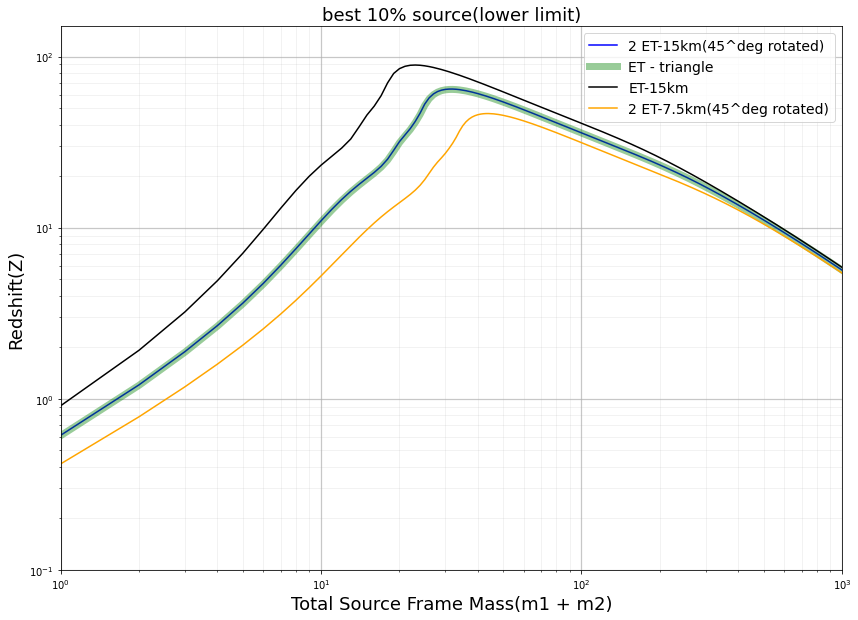

In [ ]:
pylab.figure(figsize=(14,10))
#pylab.fill_between(Mass/(1+ R),R,R10,alpha=.6)
pylab.loglog(TotalMass, Reshift_ET_singleL15km_10per, color = 'blue', label = '2 ET-15km(45^deg rotated)')
pylab.loglog(TotalMass, Reshift_ET_tri_10per, color = 'green', linewidth = 7,alpha = 0.4,  label = 'ET - triangle')
pylab.loglog(TotalMass, Reshift_ET_2L_15km_10per, color = 'black', label = 'ET-15km')
pylab.loglog(TotalMass, Reshift_ET_2L_7p5km_10per, color = 'orange', label = '2 ET-7.5km(45^deg rotated)')


plt.grid('True')

pylab.ylabel('Redshift(Z)', size = 18)
pylab.xlabel('Total Source Frame Mass(m1 + m2)', size = 18)
pylab.title('best 10% source(lower limit)', size = 18)
pylab.ylim(0.1, 150)
pylab.xlim(1, 1e3)
plt.grid(True, which='both')
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.2)
plt.grid(linewidth = thick_width)

pylab.legend(fontsize=14)





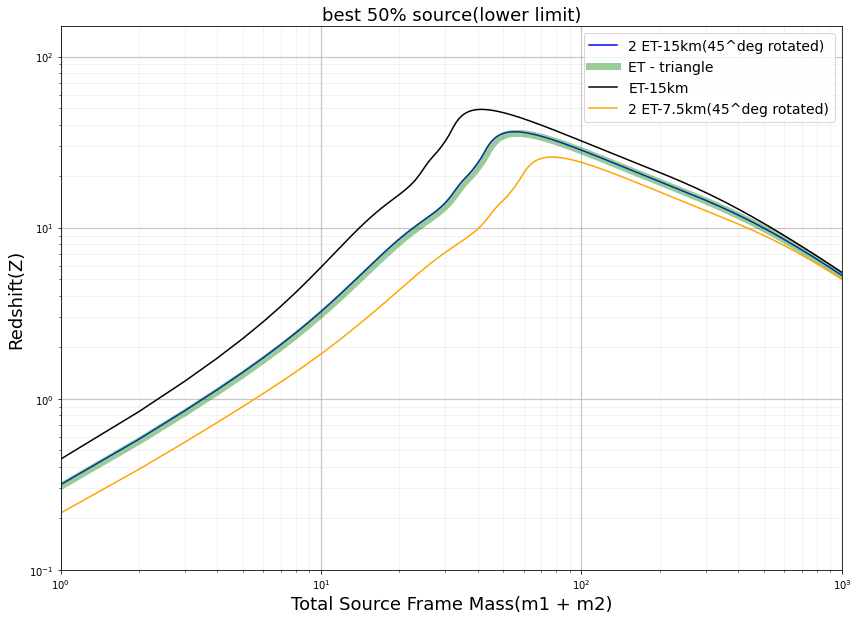

In [ ]:
pylab.figure(figsize=(14,10))
#pylab.fill_between(Mass/(1+ R),R,R10,alpha=.6)
pylab.loglog(TotalMass, Reshift_ET_singleL15km_50per, color = 'blue', label = '2 ET-15km(45^deg rotated)')
pylab.loglog(TotalMass, Reshift_ET_tri_50per, color = 'green', linewidth = 7,alpha = 0.4,  label = 'ET - triangle')
pylab.loglog(TotalMass, Reshift_ET_2L_15km_50per, color = 'black', label = 'ET-15km')
pylab.loglog(TotalMass, Reshift_ET_2L_7p5km_50per, color = 'orange', label = '2 ET-7.5km(45^deg rotated)')


plt.grid('True')

pylab.ylabel('Redshift(Z)', size = 18)
pylab.xlabel('Total Source Frame Mass(m1 + m2)', size = 18)
pylab.title('best 50% source(lower limit)', size = 18)
pylab.ylim(0.1, 150)
pylab.xlim(1, 1e3)
plt.grid(True, which='both')
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.2)
plt.grid(linewidth = thick_width)

pylab.legend(fontsize=14)

